# Analysing when businesses are re-opening during COVID

### Pre-processing Data

In [104]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [105]:
#Import data and analyze
data = r'/Users/OliverPan/Desktop/yelp_covid/yelp_covid.json'

In [106]:
yelp_df = pd.read_json(data, lines = True)

In [107]:
#Lastly, we can rename the columns
yelp_df.columns = ["id", "highlights", "d/t", "grub", "cta", "raq", "covid_banner", "closed_until", "services"]

### Analyse Time Series Column

In [108]:
#We only need the business ID and date that they are closed until
ts = yelp_df[["id", "closed_until"]]

In [109]:
ts["closed_until"].value_counts()

FALSE                       208414
2020-07-01T00:00:00.000Z       331
2020-06-15T00:00:00.000Z       263
2020-06-30T00:00:00.000Z       172
2020-08-01T00:00:00.000Z       133
                             ...  
2021-05-27T00:00:00.000Z         1
2021-03-10T00:00:00.000Z         1
2020-10-31T00:00:00.000Z         1
2024-06-14T00:00:00.000Z         1
2021-06-22T00:00:00.000Z         1
Name: closed_until, Length: 89, dtype: int64

In [110]:
#Filter out "FALSE"
ts = ts[ts["closed_until"] != 'FALSE']

In [111]:
#Change to datetime
ts["closed_until"] = pd.to_datetime(ts["closed_until"])

In [112]:
#Create a column that is just 1, so we can sum it up after
ts["sum"] = np.ones(len(ts)).astype(int)

In [113]:
ts.head()

,id,closed_until,sum
446,XwhDBNra9t3lgk1JdYlUOQ,2020-09-01 00:00:00+00:00,1
578,OpYRONhMuwcWx6kcG-MrFw,2020-06-30 00:00:00+00:00,1
1088,njibVlsPhZ9HKTAz0C3QgA,2020-06-15 00:00:00+00:00,1
1142,CyBz3mKH5D0PgZr9djNqPQ,2020-07-01 00:00:00+00:00,1
1624,1-8uoxuNCdaHlfPneJrusA,2021-01-01 00:00:00+00:00,1


In [114]:
#Group by week, and sum the opening dates
ts = ts.groupby(pd.Grouper(key="closed_until", freq='W-SUN'))["sum"].sum().to_frame().reset_index()

In [115]:
ts = ts.set_index(["closed_until"])

Text(0, 0.5, 'Number of businesses opening')

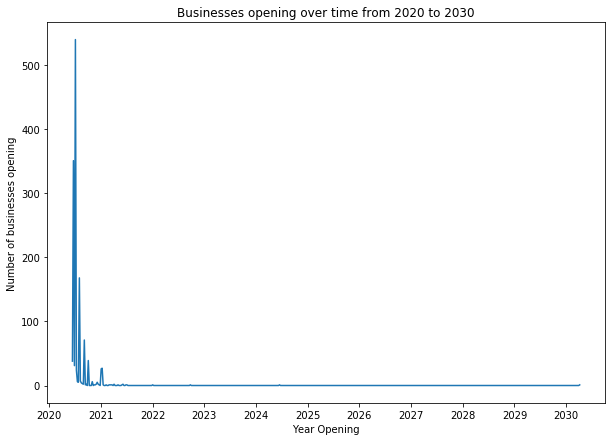

In [116]:
#Plot from 2020-2030
plt.figure(figsize=(10,7))
plt.plot(ts)
plt.title("Businesses opening over time from 2020 to 2030")
plt.xlabel("Year Opening")
plt.ylabel("Number of businesses opening")

### 2020 - 2021

In [118]:
#Let us just look at 2020 to 2021, to see when restaurants are planning to open again
ts = ts.reset_index()
ts = ts[ts["closed_until"] < "2022-01-01"]

In [119]:
ts = ts.set_index(["closed_until"])

Text(0, 0.5, 'Number of businesses opening')

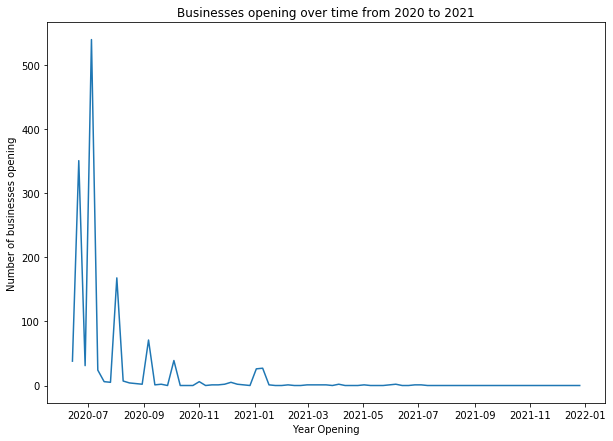

In [120]:
#Plot from 2020-2021
plt.figure(figsize=(10,7))
plt.plot(ts)
plt.title("Businesses opening over time from 2020 to 2021")
plt.xlabel("Year Opening")
plt.ylabel("Number of businesses opening")

#### We can validate that this data is correct; it is intuitive that number drops off over time